In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv('Country-data.csv')
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

country: Name of the country

child_mort: Death of children under 5 years of age per 1000 live births

exports: Exports of goods and services per capita. Given as %age of the GDP per capita

health: Total health spending per capita. Given as %age of GDP per capita

imports: Imports of goods and services per capita. Given as %age of the GDP per capita

Income: Net income per person

Inflation: The measurement of the annual growth rate of the Total GDP

life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same

total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.

gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [16]:
df['country'].unique

<bound method Series.unique of 0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object>

In [9]:
df.shape

(167, 10)

In [17]:
df.drop('country',axis=1,inplace=True)
df

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    553  
1         1.65   4090  
2         2.89   4460  
3         6.16   3530  
4         2.13  12200  
..         ...    ...  
162       3.50   2970  
163       2.47  13500  
164       1.95   1310  
165       4.67   1310  
166       5.40   1460  

[167 rows x 9 columns]

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(df)
x

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [23]:
df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [26]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
clusters=model.fit_predict(x)
clusters

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [27]:
df['Clusters']=clusters

In [28]:
centroids=model.cluster_centers_
centroids

array([[ 1.36021776, -0.43753313, -0.15598401, -0.18920377, -0.68689408,
         0.40211078, -1.28217981,  1.36494385, -0.60424243],
       [-0.40645337, -0.03165259, -0.2244709 ,  0.02416161, -0.25177041,
        -0.01716742,  0.25473362, -0.42434279, -0.35448141],
       [-0.82744866,  0.64507985,  0.72741122,  0.19063895,  1.48424268,
        -0.48492064,  1.07957853, -0.79187687,  1.61599536]])

In [29]:
plt.scatter(x[:,0],x[:,1],c=clusters,cmap='viridis')
plt.scatter(centroids[:,0],centroids[:,1],s=100,c='red')

In [40]:
# Elbow Method
wcss=[]
for i in range(1,25):
    model=KMeans(n_clusters=i)
    clusters=model.fit_predict(x)
    wcss.append(model.inertia_)
    
plt.plot(range(1,25),wcss)
plt.xlabel('n_clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

E:\anacondaa\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method')

In [45]:
model=KMeans(n_clusters=5)
clusters=model.fit_predict(x)
df['Clusters']=clusters
df

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  Clusters  
0         5.82    553         1  
1         1.65   4090         2  
2         2.89   4460         2  
3         6.16   3530         1  
4         2.13  12200         2  
..         ...    ...       ...  
162       3.50   2970         2  
163       2.47  13500         0  
164       1.95   1310         2  
165       4.67   1310         1  
166       5.40   1460         1  

[167 rows x 10 columns]

In [42]:
df.drop('Cluters',axis=1,inplace=True)
df

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  Clusters  
0         5.82    553         2  
1         1.65   4090         5  
2         2.89   4460         0  
3         6.16   3530        12  
4         2.13  12200         5  
..         ...    ...       ...  
162       3.50   2970        11  
163       2.47  13500         0  
164       1.95   1310         8  
165       4.67   1310        12  
166       5.40   1460         2  

[167 rows x 10 columns]

In [46]:
centroids=model.cluster_centers_
centroids

array([[ 0.48406464, -0.27841301, -0.61187759, -0.67628747, -0.3828263 ,
         5.24257153, -0.35967066,  0.46513754, -0.37234597],
       [ 1.34019238, -0.43446968, -0.14551762, -0.16675636, -0.68825993,
         0.21238018, -1.28539849,  1.35296147, -0.60472735],
       [-0.41995006,  0.00982596, -0.20260895,  0.05819606, -0.216217  ,
        -0.11339917,  0.27408698, -0.44240716, -0.33229365],
       [-0.82860929,  0.17262066,  0.85918977, -0.29637276,  1.46227512,
        -0.47818851,  1.10764922, -0.76368146,  1.66190214],
       [-0.84900324,  4.93567278, -0.00816303,  4.54805768,  2.4395424 ,
        -0.50420614,  1.22682431, -1.03886271,  2.44079735]])

In [47]:
plt.scatter(x[:,0],x[:,1],c=cluters,cmap='viridis')
plt.scatter(centroids[:,0],centroids[:,1],s=100,c='red')

In [48]:
df.groupby('Clusters').describe().transpose()

Clusters                     0             1             2             3  \
child_mort count      3.000000     46.000000     85.000000     30.000000   
           mean      57.733333     92.156522     21.384706      4.953333   
           std       62.746341     33.279294     13.967748      2.159140   
           min       17.100000     36.900000      3.400000      2.600000   
           25%       21.600000     63.750000     10.800000      3.825000   
...                        ...           ...           ...           ...   
gdpp       min     2330.000000    231.000000    592.000000  22100.000000   
           25%     2490.000000    548.500000   2970.000000  34025.000000   
           50%     2650.000000    833.000000   5020.000000  41850.000000   
           75%     8075.000000   1422.500000  10300.000000  48625.000000   
           max    13500.000000  17100.000000  28000.000000  87800.000000   

Clusters                      4  
child_mort count       3.000000  
           mean        4.133333  
           std         2.309401  
           min         2.800000  
           25%         2.800000  
...                         ...  
gdpp       min     21100.000000  
           25%     33850.000000  
           50%     46600.000000  
           75%     75800.000000  
           max    105000.000000  

[72 rows x 5 columns]

In [49]:
df=pd.read_csv('Country-data.csv')
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [50]:
df.drop('country',axis=1,inplace=True)
df

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    553  
1         1.65   4090  
2         2.89   4460  
3         6.16   3530  
4         2.13  12200  
..         ...    ...  
162       3.50   2970  
163       2.47  13500  
164       1.95   1310  
165       4.67   1310  
166       5.40   1460  

[167 rows x 9 columns]

In [51]:
x=scaler.fit_transform(df)
x

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

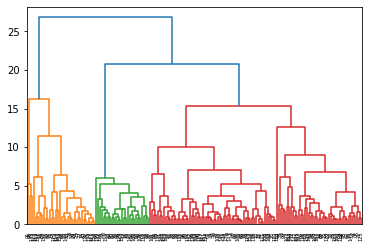

In [52]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))

In [54]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=2)
clusters=model.fit_predict(x)
df['Clusters']=clusters
df

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  Clusters  
0         5.82    553         0  
1         1.65   4090         0  
2         2.89   4460         0  
3         6.16   3530         0  
4         2.13  12200         0  
..         ...    ...       ...  
162       3.50   2970         0  
163       2.47  13500         0  
164       1.95   1310         0  
165       4.67   1310         0  
166       5.40   1460         0  

[167 rows x 10 columns]

In [55]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pcs=pca.fit_transform(x)
pcs

array([[-2.91302459e+00,  9.56205755e-02],
       [ 4.29911330e-01, -5.88155666e-01],
       [-2.85225077e-01, -4.55174413e-01],
       [-2.93242265e+00,  1.69555507e+00],
       [ 1.03357587e+00,  1.36658709e-01],
       [ 2.24072616e-02, -1.77918658e+00],
       [-1.01583737e-01, -5.68251724e-01],
       [ 2.34216461e+00, -1.98845915e+00],
       [ 2.97376366e+00, -7.34688659e-01],
       [-1.81486997e-01, -4.02865873e-01],
       [ 1.26874386e+00, -6.56588363e-01],
       [ 1.67099640e+00,  5.61162493e-01],
       [-1.12385093e+00, -9.61397405e-01],
       [ 1.08137420e+00, -4.81969530e-01],
       [ 5.80025152e-01,  5.35326834e-01],
       [ 3.14378596e+00,  6.63547921e-01],
       [ 2.11255447e-01,  6.99242662e-01],
       [-2.67231388e+00,  4.18172125e-01],
       [-1.56570962e-01,  7.77395617e-01],
       [-7.93851561e-01, -1.20261085e-01],
       [ 9.95867143e-01, -9.71888439e-01],
       [-8.82087639e-01,  4.57368180e-01],
       [ 1.40781361e-01, -2.15107731e+00],
       [ 2.

In [56]:
pc_df=pd.DataFrame(pcs,columns=['PC1','PC2'])
pc_df

PC1       PC2
0   -2.913025  0.095621
1    0.429911 -0.588156
2   -0.285225 -0.455174
3   -2.932423  1.695555
4    1.033576  0.136659
..        ...       ...
162 -0.820631  0.639570
163 -0.551036 -1.233886
164  0.498524  1.390744
165 -1.887451 -0.109453
166 -2.864064  0.485998

[167 rows x 2 columns]

In [58]:
fin_df=pd.concat([pc_df,df[['gdpp']]],axis=1)
fin_df

PC1       PC2   gdpp
0   -2.913025  0.095621    553
1    0.429911 -0.588156   4090
2   -0.285225 -0.455174   4460
3   -2.932423  1.695555   3530
4    1.033576  0.136659  12200
..        ...       ...    ...
162 -0.820631  0.639570   2970
163 -0.551036 -1.233886  13500
164  0.498524  1.390744   1310
165 -1.887451 -0.109453   1310
166 -2.864064  0.485998   1460

[167 rows x 3 columns]

E:\anacondaa\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anacondaa\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anacondaa\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anacondaa\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anacondaa\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anacondaa\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anacondaa\lib\site-packages\seaborn\distrib

E:\anacondaa\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anacondaa\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anacondaa\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anacondaa\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anacondaa\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anacondaa\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anacondaa\lib\site-packages\seaborn\distrib

E:\anacondaa\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anacondaa\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anacondaa\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anacondaa\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anacondaa\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anacondaa\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anacondaa\lib\site-packages\seaborn\distrib

E:\anacondaa\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anacondaa\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anacondaa\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anacondaa\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anacondaa\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anacondaa\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anacondaa\lib\site-packages\seaborn\distrib

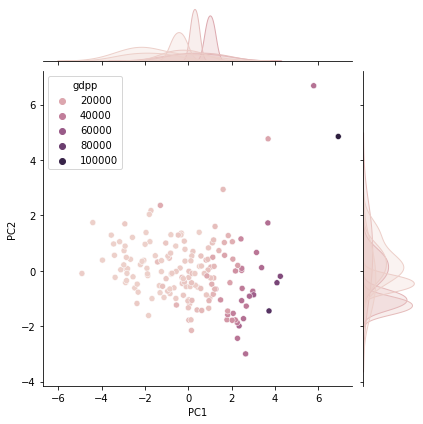

In [60]:
sns.jointplot(x='PC1',y='PC2',hue='gdpp',data=fin_df)